# Single stellar population guide of usage alongside Models Of Stripped Stars (MOSS) [(Götberg, Y. et al.)](https://ui.adsabs.harvard.edu/abs/2019A%26A...629A.134G/abstract)

*Victor Ramirez Delgado*

## 0. Introduction

The present notebook provides a step by step of our analysis of single stellar populations of magnetic massive stars. The evolutionary models used for each star in the population were developed using Modules for Experiments in Stellar Astrophysics [(MESA)](https://docs.mesastar.org/en/release-r22.05.1/index.html), presented in [Z. Keszthelyi, et al. (2022)](https://academic.oup.com/mnras/article/517/2/2028/6701644). Since we are interested in recreating large numbers of stars, a task that would take too much computing time with MESA, we used MOSS [(Götberg, Y. et al.)](https://ui.adsabs.harvard.edu/abs/2019A%26A...629A.134G/abstract) to handle both the creation of stars and the evolution of each of them in our simulated star cluster. The following sections explain the theoretical background of how we calculate the magnetic field of the stars, organizing the MESA models to be read by MOSS, setting up the parameter file of MOSS, and lastly analyzes a test case that we developed.


## 1. Theoretical Background

### 1.1 Modeling the surface magnetic field $B$ of a star

Our models a simple relation to describe the evolution of the surface magnetic field as dependent only on the stellar raidus given by:

$$ B(t) = B_0 \left(\frac{R_\odot}{R(t)}\right)^2,$$

where $B_0$ is the initial magentic field at the zero-age main sequence (ZAMS), $R$ is the stellar radius, $t$ is time and $R_\odot$ is the solar radius.

### 1.2 The initial $B$ field function

In this study we used a log normal distribution $\log(\mu, \sigma)$ that takes two parameters $\mu$ and $\sigma$. The propbability density function of the log normal distribution is given by:
$$ P(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp{\left(-\frac{1}{2}\left(\frac{\log(x) - \mu}{\sigma}\right)^2\right)}$$

where in this case $x$ represents the index of each of the stars. The parameters $\mu$ and $\sigma$ are not the mean and the standard deviation of the distribution, but rather their log values, otherwise we would get incoherent results since this a a log normal distribution

### 1.3 Creating a population of stars through starburst

The way the code handles the creation of stars is through two options: starburst or constant star formation. In this study we focus on exploring the starburst setting in order to recreate the conditions of a star cluster where most stars are born at approximately the same time. The code creates the whole population of stars at the initial time and then evolves all of the stars according to the models passed to the code.

## 2. Setting up MOSS

MOSS is run through python scripts that read in the MESA files and handle the evolution of stars at different ages. As a first step to get the code running is to organize the folders of the MESA model. Each individual model is assigned to a specific value of the initial magnetic field and mass at ZAMS. 

1. First we create a folder named ```Grid``` in your desired working directory, making sure that MOSS is located in the same folder. 

2. Then we need to create a folder inside ```Grid``` for each value of the initial magnetic field that our MESA models contain (including the non magnetic models labeled as 0) 

3. Inside each of the magnetic field folders we now divide them in values of the initial mass.

4. Inside each folder of the initial mass is where we find our ```.data``` file that contains our MESA model for that specific value of the magnetic fiedl. Our files are structures as: ```logM$M_val$logB$B_val$.data``` where ```$M_val$``` is the value of the initial mass and ```$B_val$``` is the value of the magnetic field.

5. Lastly, inside each folder of the initial mass aside from having the ```.data``` file, there must a sub directory called ```LOGS```, and inside of it there must a history file created from running MESA. **All of these history files must be names the same!**. The code the defaults to the name ```out.data``` which is what we used.

To illustrate the structure of the folders we refer to the following diagram:

```
Grid
└───0                                 #folder of 0 magnetic field
│   └───10                            #subfolder of 10 sollar masses
│   │   │   logM1.0logBNO.data
│   │   └───LOGS
│   │       │  out.data
│   │
│   └───12.6                          #subfolder of 12.6 solar masses
│   │   │   logM1.1logBNO.data
│   │   └───LOGS
│   │       │  out.data
│   │
│   └───15.8                          #subfolder of 15.8 solar masses
│   │   │   logM1.2logBNO.data
│   │   └───LOGS
│   │       │  out.data
│   │ 
│   └───20                            #subfolder of 20 solar masses
│   │   │   logM1.3logBNO.data
│   │   └───LOGS
│   │       │  out.data
│   │
│   ...
└───1000                              #folder of 1000 Gauss magnetic field
│   └───10                            #subfolder of 10 sollar masses
│   │   │   logM1.0logB0.0.data
│   │   └───LOGS
│   │       │  out.data
│   │
│   └───12.6                          #subfolder of 12.6 solar masses
│   │   │   logM1.1logB0.0.data
│   │   └───LOGS
│   │       │  out.data
│   │
│   └───15.8                          #subfolder of 15.8 solar masses
│   │   │   logM1.2logB0.0.data
│   │   └───LOGS
│   │       │  out.data
│   │ 
│   └───20                            #subfolder of 20 solar masses
│   │   │   logM1.3logB0.0.data
│   │   └───LOGS
│   │       │  out.data
│   │
│   ...
...
```
Illustrating the folders with magnetic fields of 0 and 1000 Gauss, and inside of them sub folders with masses from 10 to 20 solar masses. The ellipsis are to refer that can be more subfolders and folders for other values of magnetic fields and initial masses.

## 3. Editing the ```input.txt``` file

After setting up the Grid folder now we are able to run $\texttt{MOSS}$ to generate our stellar population. The main file we want to edit before every run is the ```input.txt``` that contains the input parameters for the population synthesis. The file has many different settings to play around ranging from the total time to run the simulation, to binary stars settings. Since our models are solely for single stars, we omit all of the parameters that control the evolution of binary stars. In the following list we detail the parameters we are concerned with thus far and specify the values we have given them in our test case.

* ```run_name```: determines the name of the current run to differentiate the outputs of each run

* ```duration```: the time duration to calculate the population of stars in years. Our value is set to $10^9$ years

* ```metallicity```: metallicity of the star population set to $0.006$

* ``` loc_sin_grid```: path to where the single stellar models are stored, **wihtout a magnetic field**. In our case the value given to this variable is: ```Grid/0```. For the code to run it needs to have path for this argument. There are also several other paths for binaray evolution that are commmented out.


* ``` loc_B_grids```: path to where the magnetic models are stored, similar as the previous varaible. In our case the value given to this variable is: ```Grid```. This is an optional parameter that is computed only when wanting to analyze magnetic stars

* ```exclude_pMS```: exclude the post-Main sequence evolution. Set to true in all of our runs.

* ```type_SF```: Option to change the type of star formation set to either constant star formation or starburst. We use the starburst option

* ```total_mass_starburst```: total mass that the simulation starts with to create the cluster of stars in solar masses . We set equal to $10^5 M_\odot$

* ``` evaluation_time```: time steps that the user wants to output the current state of the simulation in years. It can be one or multiple times. In case of multiple time steps they are separated only by commas. Our values where we ask the code to output are: ```1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,1e7,2e7,3e7,4e7,5e7,6e7,7e7,8e7,9e7,1e8,2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8```.

* ```IMF_choice```: name of the initial mass function (IMF) for the code to use given the optiosn of Kroupa (Kroupa 2001), Salpeter (Salpeter 1939), Alt_Kroupa. We set it equal to  ```Kroupa```. 

* ```mmin```: Minimum mass in the IMF, set to $0.1M_\odot$

* ```mmax```: Maximum mass in the IMF, set to $100M_\odot$

* ```IBF_choice```: Choice for the initial magnetic field function (IBF). The options are flat, gaussian, log 10 normal, and Poisson distributiona. We used the ```IBF_log10normal``` option

* ```Bmin```: Minimum value of the magnetic field strenght in Gauss, set to $0.0$ 

* ```Bmax```: Maximum  value of the magnetic field strenght in Gauss, set to $50000.0$ G 

* ```Bmean```: log base 10 of the mean value of the distrubution. Set to $\log(\mu) = 3.6$ which is equivalent to $\mu \approx 3981$ G

* ```Bstdev```: log base 10 of the standard deviation of the. Set to $\log(\sigma) = 0.6$ which is equivalent to $\sigma \approx 3.9$ G

* ```Bfrac```: fraction of magnetic stars that are magnetic. Set to 100%

* ```col```: parameters to show in the output files and that are associated with columns in the MESA files. Therefore, in order to output a column it must exist in the MESA .data files. Our columns are set to : ```log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,Bp```

* ```history_filename```: name given to all of the history files from MESA for each of the models mentioned previously. The name used was ```out.data``` which is the default of the code. 

* ```record_stars```: Option to modify what stars are written in the output files. The options are for only stripped stars or all stars. We used ```all```. The value must be 

* ```minimum_mass_to_print```: Minimum mass of stars printed in the output file, used to reduce the number of stars and size of output files. Set to $4.9M_\odot$. The value must not be smaller than the minimum mass passed to the IMF.

* ```maximum_mass_to_print```: Masimum mass of stars printed in the output file. Set to $100 M_\odot$. The value must not be greater than the maximum mass passed to the IMF.

Once all of these parameters are set we go into our terminal and run the command:

```
python3 MOSS.py
```

and the code should star computing our population synthesis!

## 4. Output files

The output files are named in the following format:

```
data1_$run_name$_$evaluation_time$yrs.txt

```
where ```run_name``` and ```evaluation_time``` are specified in the ```input.txt``` file. For example, if we named our run "test" and we asked to evaluate it at $10^6$ years, its name will be ```data1_test_1000000.0yrs.txt```.

Inside each output file we will first encounter information about the run, its initial conditions such as the directory that contains the grid of models, the metallicity and other parameters set in the input.txt file. 

The main part of the ouput file is the information about the stars after the given evaluation time. Note that the stars recorded in the output excludes any stars that died. We will find in this file several columns, starting with ```Star_ID``` and ```Star_state```. The first one is the identification number that the code assigns to each individual star to differentiate them from each other. The latter value indicates the star state from the following possible values:

* 1 $→$ Main-Sequence star
* 2 $→$ Stripped star
* 3 $→$ Post Main-Sequence star
* 4 $→$ Compact object
* 51 $→$ Merger product in MS stage

In our study we only consider stars in the MS and omit all of the other possible states. The rest of the ouput columns are associated with the initial mass of the star, the initial value of the magnetic field and the MESA columns in the history file. Therefore, all of the quantities passed to the variable ```col``` in ```input.txt``` will be recorded in the ouput file for each individual star.

## 5. Analyzing the output files

The code below gives and example of reading an output file at an age of 34000 years and plotting the HR diagram of the stars in the cluster color coded with their current magnetic field. Handling the output file is done using $\texttt{pandas}$ dataframes.



In [ ]:
# mount the google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Research/magneticstars/

/content/drive/MyDrive/Research/magneticstars


In [ ]:
ls

data1_z14mix1_01_3400000.0yrs.txt  perceived-color-test.mp4     star_server/
gradTutorial/                      SingleStellarbackup/         work/
__MACOSX/                          SingleStellarPopulation/
MagneticStars/                     SingleStellarPopulation.zip


In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#make better plots
#plt.style.use(['grid'])
plt.rcParams.update({"font.size" : 26})
plt.rcParams.update({"axes.labelsize" : 26})
plt.rcParams.update({"xtick.labelsize" : 22})
plt.rcParams.update({"ytick.labelsize" : 22})
plt.rcParams.update({"axes.titlesize" : 26})
plt.rcParams.update({"figure.figsize": (10,8)})
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.axisbelow" : True})
plt.rcParams.update({"grid.linestyle" : '--'})
plt.rcParams.update({"grid.color" : 'k'})
plt.rcParams.update({"grid.alpha" : 0.5})
plt.rcParams.update({"grid.linewidth" : 0.5})

# Legend
plt.rcParams.update({"legend.frameon" : True})
plt.rcParams.update({"legend.framealpha" : 1.0})
plt.rcParams.update({"legend.fancybox" : True})
plt.rcParams.update({"legend.numpoints" : 1})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
#read the data file
name = 'data1_z14mix1_01_3400000.0yrs.txt'
data = pd.read_csv(name, sep='\t', header = 16)
data.columns = data.columns.str.replace(' ', '')
data.head()

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650


In [ ]:
#check how many stars are in the cluster
print('Number of stars: ', len(data))

Number of stars:  3891


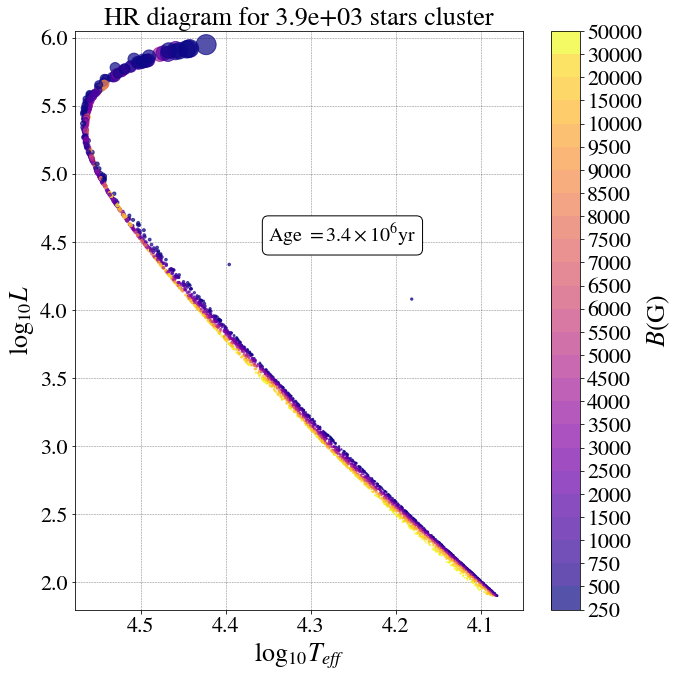

In [ ]:
# plot the HR diagram colorcoded with their magnetic field
import matplotlib as mpl
from matplotlib import cm
fig, ax = plt.subplots(figsize=(10,10))

lower = np.linspace(250,1000,4)
middle = np.linspace(1500,10000,18)
upper = np.array([15e3,2e4,3e4,5e4])
bounds = np.concatenate((lower,middle,upper),axis = None)
N = len(bounds)
cmap = plt.get_cmap('plasma', N)
n_stars = data.shape[0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax.set_ylim(np.min(data['log_L'])-0.1,np.nanmax(data['log_L'])+0.1)
#ax.set_ylim(2.55,np.sort(data['log_L'])[-2]+0.1)
ax.set_xlim(4.05,np.nanmax(data['log_Teff'])+0.01)
ax.set_xlabel(r'$\log_{10}{T_{eff}}$')
ax.set_ylabel(r'$\log_{10}{L}$')
ax.set_title('HR diagram for {:.1e} stars cluster'.format(n_stars))
ax.invert_xaxis()
ax.text(4.35, 4.5, r'Age $= 3.4\times10^6$yr', size=20, bbox =dict(boxstyle='round', facecolor = 'white'))
area =0.2* (10**data['log_R'])**2
ban = ax.scatter(data['log_Teff'],data['log_L'],\
                 c =data['Beq'], cmap=cmap,s=area, norm=norm,alpha = 0.7)

fig.colorbar(ban, ticks = bounds,label=r'$B (\mathrm{G})$')
plt.tight_layout()

There a couple of stars that seem to be off the HR diagram and that is probably caused by a few errors in the interpolation. To remove them we can simply omit them from our dataframe.

In [ ]:
#find the one that is out of the HR diagram
data.query("`log_Teff`<4.2 and `log_L`>4.0")

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq
3861,155207,1,15.3282,476.03445,4.18119,4.08044,0.34975,0.57309,4.08079,0.0,0.71603,3.181895e+06,3.82968,14.35968,281.82617,348.89806


In [ ]:
#omit these stars
data = data.loc[data['log_Teff']>3.70]
data = data.loc[data['#Star_ID']!= 34661]

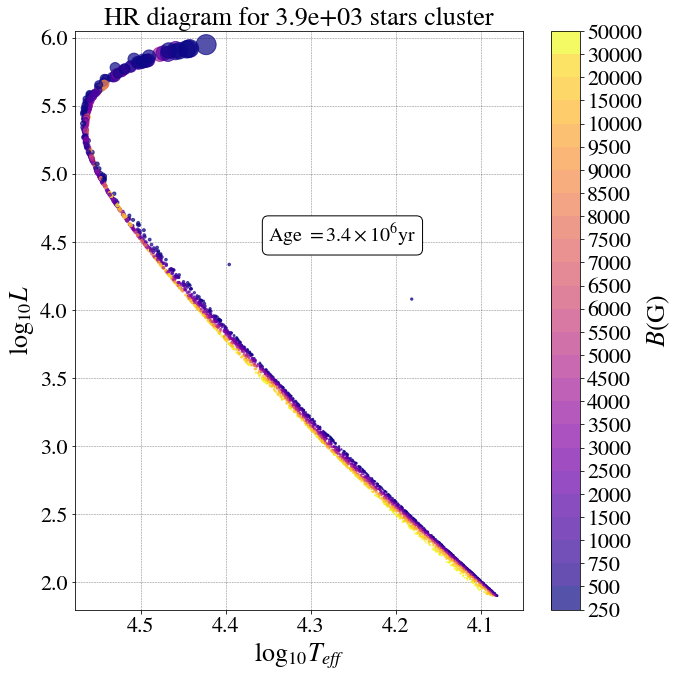

In [ ]:
#plot once again
cmap = plt.get_cmap('plasma', N)
n_stars = data.shape[0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
area =0.2* (10**data['log_R'])**2
fig, ax = plt.subplots(figsize=(10,10))

ax.set_ylim(np.min(data['log_L'])-0.1,np.nanmax(data['log_L'])+0.1)
#ax.set_ylim(2.55,np.sort(data['log_L'])[-2]+0.1)
ax.set_xlim(4.05,np.nanmax(data['log_Teff'])+0.01)
ax.set_xlabel(r'$\log_{10}{T_{eff}}$')
ax.set_ylabel(r'$\log_{10}{L}$')
ax.set_title('HR diagram for {:.1e} stars cluster'.format(n_stars))
ax.invert_xaxis()
ax.text(4.35, 4.5, r'Age $= 3.4\times10^6$yr', size=20, bbox =dict(boxstyle='round', facecolor = 'white'))
ban = ax.scatter(data['log_Teff'],data['log_L'],\
                 c =data['Beq'], cmap=cmap,s=area, norm=norm,alpha = 0.7)

fig.colorbar(ban, ticks = bounds,label=r'$B (\mathrm{G})$')
plt.tight_layout()

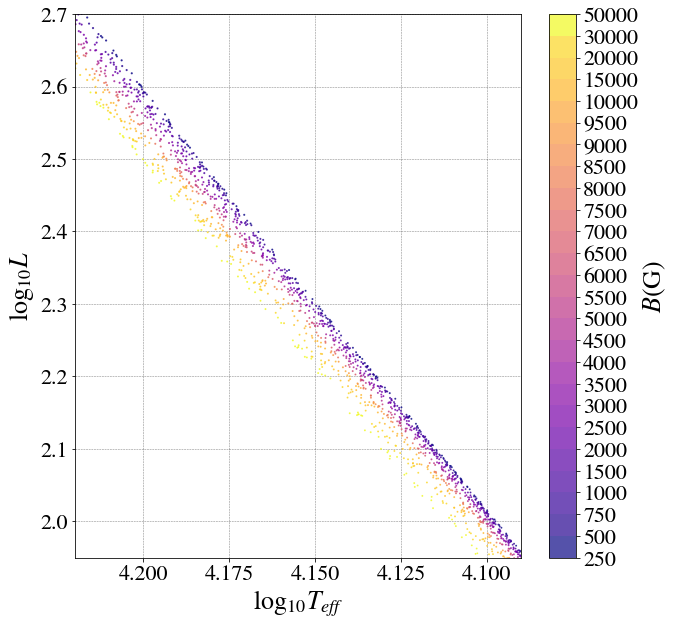

In [ ]:
#we can also zoom in into a region of the HR diagram to get a closer look
fig, ax = plt.subplots(figsize=(10,10))

ax.set_ylim(1.95,2.7)
ax.set_xlim(4.09,4.22)
ax.set_xlabel(r'$\log_{10}{T_{eff}}$')
ax.set_ylabel(r'$\log_{10}{L}$')
#ax.set_title('HR diagram for {:.1e} stars cluster'.format(n_stars))
ax.invert_xaxis()
#ax.text(4.35, 4.5, r'Age $= 3.4\times10^6$yr', size=20, bbox =dict(boxstyle='round', facecolor = 'white'))
ban = ax.scatter(data['log_Teff'],data['log_L'],\
                 c =data['Beq'], cmap=cmap,s=area, norm=norm,alpha = 0.7)

fig.colorbar(ban, ticks = bounds,label=r'$B (\mathrm{G})$')